In [38]:
import pandas
# import matplotlib
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import seaborn
%matplotlib inline

import data.textile_dataframes as td


# Датафреймы:
# balanced - сбалансированные ткани;
# unbalanced - несбалансированные ткани;
# narrow_bands - узкие бинты;
# middle_bands - средние бинты;
# wide_bands - широкие бинты;



In [39]:
# все бинты (всех типов)
all_bands = pandas.concat([td.narrow_bands, td.middle_bands, td.wide_bands])
all_bands_number = len(all_bands)

########################################################################################################################

# описательные статистики для узких бинтов;
narrow_bands_descriptive = []
narrow_bands_descriptive.append({'warp_mean': round(td.narrow_bands['warp_mean'].mean(), 3),
                     'weft_mean': round(td.narrow_bands['weft_mean'].mean(), 3),
                     'warp_median': round(td.narrow_bands['warp_mean'].median(), 3),
                     'weft_median': round(td.narrow_bands['weft_mean'].median(), 3)})
print(narrow_bands_descriptive)

# описательныестатистики для средних бинтов;
middle_bands_descriptive = []
middle_bands_descriptive.append({'warp_mean': round(td.middle_bands['warp_mean'].mean(), 3),
                     'weft_mean': round(td.middle_bands['weft_mean'].mean(), 3),
                     'warp_median': round(td.middle_bands['warp_mean'].median(), 3),
                     'weft_median': round(td.middle_bands['weft_mean'].median(), 3)})
print(middle_bands_descriptive)

# описательные статистики для широких бинтов;
wide_bands_descriptive = []
wide_bands_descriptive.append({'warp_mean': round(td.wide_bands['warp_mean'].mean(), 3),
                     'weft_mean': round(td.wide_bands['weft_mean'].mean(), 3),
                     'warp_median': round(td.wide_bands['warp_mean'].median(), 3),
                     'weft_median': round(td.wide_bands['weft_mean'].median(), 3)})
print(wide_bands_descriptive)

########################################################################################################################


[{'warp_mean': 0.467, 'weft_mean': 0.485, 'warp_median': 0.45, 'weft_median': 0.5}]
[{'warp_mean': 0.48, 'weft_mean': 0.541, 'warp_median': 0.45, 'weft_median': 0.5}]
[{'warp_mean': 0.429, 'weft_mean': 0.436, 'warp_median': 0.425, 'weft_median': 0.4}]


/Users/streltcov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


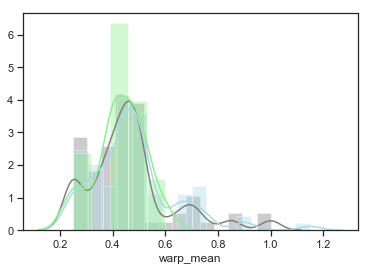

In [40]:
seaborn.distplot(td.narrow_bands['warp_mean'], color='gray')
seaborn.distplot(td.middle_bands['warp_mean'], color='lightblue')
seaborn.distplot(td.wide_bands['warp_mean'], color='lightgreen')


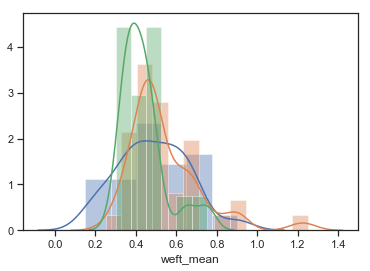

In [41]:
seaborn.distplot(td.narrow_bands['weft_mean'])
seaborn.distplot(td.middle_bands['weft_mean'])
seaborn.distplot(td.wide_bands['weft_mean'])


In [42]:

########################################################################################################################

total_number = len(td.dataframe)

# Ткани с переплетением "рогожка";
baskets = td.dataframe[td.dataframe['weaving_technique'] == 'basket']
baskets_number = len(baskets)
baskets_percent = (baskets_number / total_number) * 100
print('basket percent - ' + str(baskets_percent))


basket percent - 3.7453183520599254


In [43]:
# Группы тканей:
#
# По плотности:
# Качество нитей оценивается по двум параметрам - крутке и диаметру нити;
# 

In [44]:
group_1_df = td.dataframe.query("warp_dens < 13")
group_1_df = group_1_df.query("warp_mean > 0.5 and warp_mean < 0.8")
group_1_df = group_1_df.query("weft_mean > 0.6 and weft_mean < 0.9")
print("group #1 length - " + str(len(group_1_df)))
group_1_df.head()


group #1 length - 11


,grave,internal_storage,warp_size,weft_size,type,condition,weaving_technique,warp_material,weft_material,warp_dyed,...,angle_weft,warp_a,warp_b,weft_a,weft_b,warp_dens,weft_dens,warp_mean,weft_mean,density_coefficient
9,88,2007-0034-003,100,100,m_band,fragment,tabby,linen,linen,no,...,medium,0.5,0.6,0.6,1.0,12.0,8.0,0.55,0.8,1.50
11,88,2007-0034-005,400,40,m_band,fragment,tabby,linen,linen,no,...,uneven,0.5,1.0,0.4,1.0,12.0,9.0,0.75,0.7,1.33
28,107,2007-0040,110,70,fabric,fragment,tabby,linen,linen,no,...,loose,0.5,0.8,0.6,1.0,12.0,8.0,0.65,0.8,1.50
36,133,2010- 0001-002,140,45,band,fragment,tabby,linen,linen,no,...,medium,0.6,0.8,0.6,1.0,12.0,10.0,0.70,0.8,1.20
110,173,2008-0031-003-01,270,25,n_band,fragment,tabby,linen,linen,no,...,medium,0.6,0.8,0.6,0.8,12.0,10.0,0.70,0.7,1.20


In [45]:
group_2_df = td.dataframe.query("warp_dens > 14 and warp_dens < 30")
group_2_df = group_2_df.query("warp_mean > 0.3 and warp_mean < 0.6")
group_2_df = group_2_df.query("weft_mean > 0.3 and weft_mean < 0.5")
print(len(group_2_df))
group_2_df.head()


56


,grave,internal_storage,warp_size,weft_size,type,condition,weaving_technique,warp_material,weft_material,warp_dyed,...,angle_weft,warp_a,warp_b,weft_a,weft_b,warp_dens,weft_dens,warp_mean,weft_mean,density_coefficient
20,95,2007-0050-006,260,30,n_band,fragment,tabby,linen,linen,no,...,uneven,0.3,0.6,0.3,0.6,24.0,9.0,0.45,0.45,2.67
30,108,2007-0047-002,50,290,m_band,fragment,tabby,linen,linen,no,...,medium,0.2,0.5,0.2,0.5,16.0,14.0,0.35,0.35,1.14
33,126,2007- 0077-005,130,60,fabric,fragment,tabby,linen,linen,light,...,loose,0.2,0.5,0.4,0.5,23.0,12.0,0.35,0.45,1.92
39,133,2008-0036-001-02,60,30,n_band,fragment,tabby,linen,linen,no,...,medium,0.4,0.5,0.4,0.5,24.0,10.0,0.45,0.45,2.40
41,133,2008-0036-001-04,20,20,fabric,fragment,tabby,linen,linen,no,...,medium,0.3,0.5,0.3,0.5,24.0,10.0,0.40,0.40,2.40


In [46]:
group_3_df = td.dataframe.query("warp_dens > 30")
print("group #3 length - " + str(len(group_3_df)))



group #3 length - 41


In [47]:
#print(dataframe['density_coefficient'])
#print(dataframe[dataframe.density_coefficient == 'NaN'])


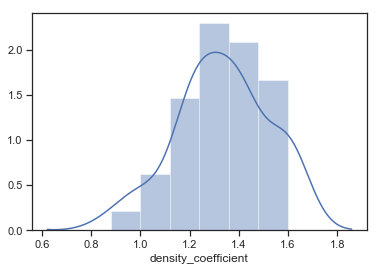

In [48]:
# pyplot.hist(td.balanced['density_coefficient'], bins=10)
seaborn.distplot(td.balanced['density_coefficient'])


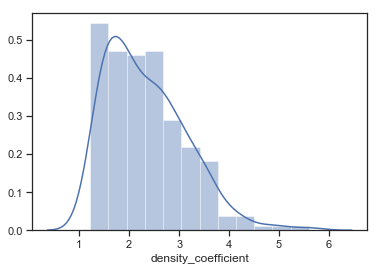

In [49]:
# pyplot.hist(td.unbalanced['density_coefficient'], bins=20)
seaborn.distplot(td.unbalanced['density_coefficient'])


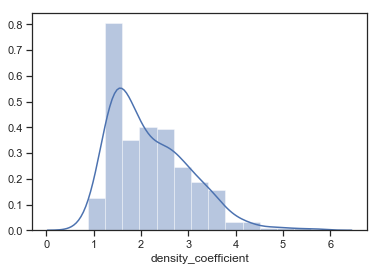

In [50]:
# pyplot.hist(td.dataframe['density_coefficient'], bins=20)
seaborn.distplot(td.dataframe['density_coefficient'])


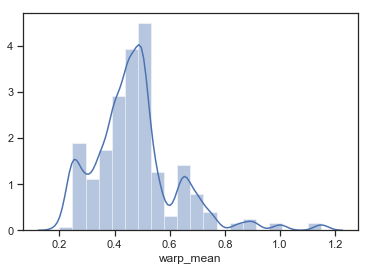

In [51]:
# pyplot.hist(td.dataframe['warp_mean'], color='cyan', bins=20)
seaborn.distplot(td.dataframe['warp_mean'], bins=20)


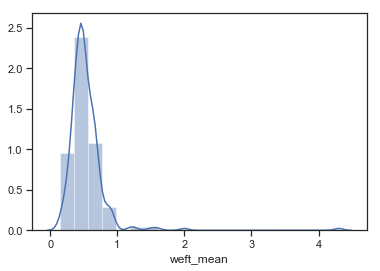

In [52]:
# pyplot.hist(td.dataframe['weft_mean'], bins=20)
seaborn.distplot(td.dataframe['weft_mean'], bins=20)

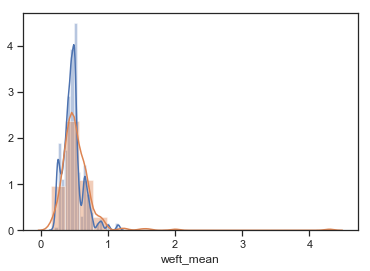

In [53]:
seaborn.distplot(td.dataframe['warp_mean'], bins=20, hist=True)
seaborn.distplot(td.dataframe['weft_mean'], bins=20, hist=True)


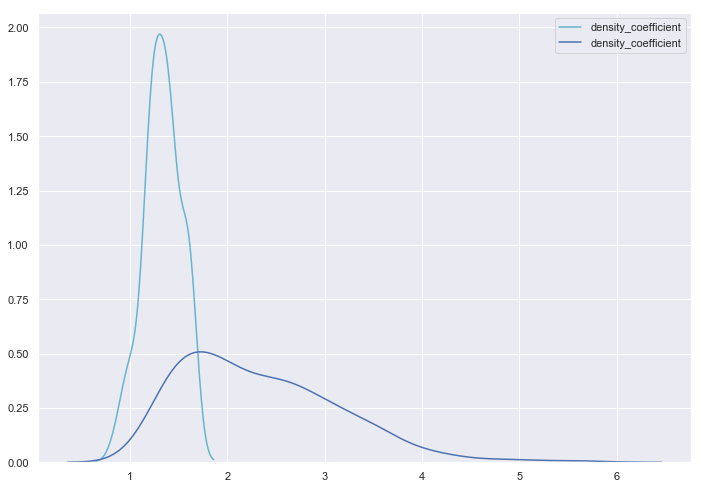

In [54]:
seaborn.set_style("whitegrid")
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
seaborn.set(rc={'figure.figsize': (11.7,8.27)})
seaborn.kdeplot(td.balanced['density_coefficient'], color='c')
seaborn.kdeplot(td.unbalanced['density_coefficient'], color='b')


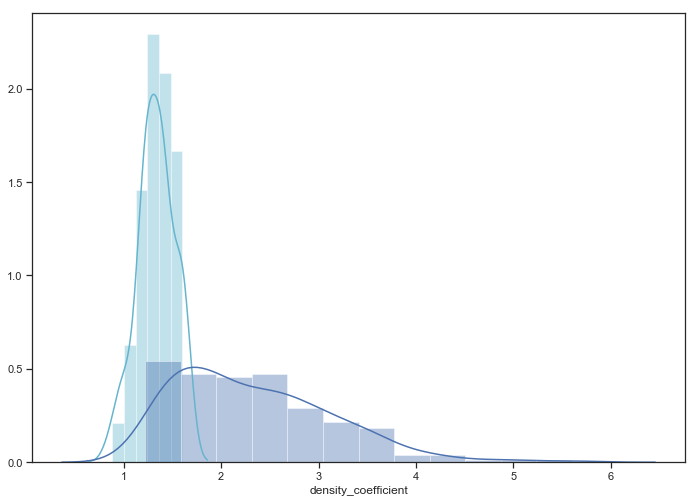

In [55]:
# seaborn charts
seaborn.set_style("whitegrid")
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
seaborn.distplot(td.balanced['density_coefficient'], kde=True, color='c')
seaborn.distplot(td.unbalanced['density_coefficient'], kde=True, color='b')


In [56]:
shapiro_warp_mean = stats.shapiro(td.dataframe['warp_mean'].values)
shapiro_weft_mean = stats.shapiro(td.dataframe['weft_mean'].values)
shapiro_dens_coeff = stats.shapiro(td.dataframe['density_coefficient'].values)
pearson_warp_weft_dens = stats.pearsonr(td.dataframe['warp_mean'], td.dataframe['weft_mean'])


##### Коэффициент корреляции для плотностей по основе и утку:


In [57]:
print(pearson_warp_weft_dens)

##### Проверки на нормальность распределения толщин нитей по основе и по утку:


(0.48897522780799724, 1.869552849160922e-17)


In [58]:
print('{:.20f}'.format(shapiro_warp_mean[1]))
print('{:.20f}'.format(shapiro_weft_mean[1]))


0.00000000000624036369
0.00000000000000000000


##### Проверка "коэффициента плотности" на нормальность распределения:

In [59]:
print(round(float(shapiro_dens_coeff[1]), 10))
print('{:.20f}'.format(shapiro_dens_coeff[1]))

1e-10
0.00000000013641152097


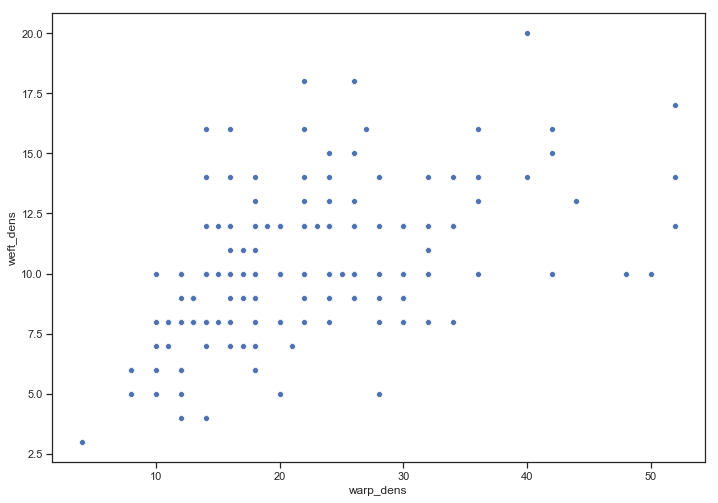

In [65]:
scatter_densities = seaborn.scatterplot(x='warp_dens', y='weft_dens', data=td.dataframe)
# scatter_densities_2 = seaborn.scatterplot(x='weft_dens', y='warp_dens', data=td.dataframe)
